# loading the classes 

In [1]:
import sys
sys.path.append('..')

from my_package.data_cleaning import *
from my_package.modeling import *
from my_package.preprocessing import *
from my_package.nn_modeling import *

# Splitting the data

In [2]:
def split_data(df,criteria='random'):
    X = df.drop(['fraud_bool'], axis=1)
    y = df['fraud_bool']
    if criteria=='paper':

        # Train test split by 'month', month 0-5 are train, 6-7 are test data as proposed in the paper
        X_train = X[X['month']<6]
        X_test = X[X['month']>=6]
        y_train = y[X['month']<6]
        y_test = y[X['month']>=6]


    elif criteria=='random':
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    elif criteria=='stratify':

        X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42) 

    X_train.drop('month', axis=1, inplace=True)
    X_test.drop('month', axis=1, inplace=True)
    return X_train, X_test, y_train, y_test

# reading the data

In [3]:
# reading the base csv file using the custom class
df=data_cleaning('Base.csv')

In [4]:
df.data['income']= df.data['income'].astype(float)
df.data['customer_age']= df.data['customer_age'].astype(int)
df.data['email_is_free']=df.data['email_is_free'].astype(int)
df.data['phone_home_valid']=df.data['phone_home_valid'].astype(int)
df.data['phone_mobile_valid']=df.data['phone_mobile_valid'].astype(int)
df.data['has_other_cards']=df.data['has_other_cards'].astype(int)
df.data['foreign_request']=df.data['foreign_request'].astype(int)
df.data['keep_alive_session']=df.data['keep_alive_session'].astype(int)
df.data['source']=df.data['source'].astype('object')
df.data['device_distinct_emails_8w']=df.data['device_distinct_emails_8w'].astype(int)

In [5]:
df.data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,24,0,500.0,0,INTERNET,3.888115,windows,0,1,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,-1,0,200.0,0,INTERNET,4.728705,other,0,1,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,31,1,200.0,0,INTERNET,2.047904,linux,0,1,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,7


### data validity:

In [6]:
df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   fraud_bool                        1000000 non-null  category
 1   income                            1000000 non-null  float64 
 2   name_email_similarity             1000000 non-null  float64 
 3   prev_address_months_count         1000000 non-null  int64   
 4   current_address_months_count      1000000 non-null  int64   
 5   customer_age                      1000000 non-null  int32   
 6   days_since_request                1000000 non-null  float64 
 7   intended_balcon_amount            1000000 non-null  float64 
 8   payment_type                      1000000 non-null  object  
 9   zip_count_4w                      1000000 non-null  int64   
 10  velocity_6h                       1000000 non-null  float64 
 11  velocity_24h             

- in the data cleaning class ,we have reformated the columns to there suitable data type and deleted the device_fraud_count column as it was constant for all the records.
- we changed the age and income to category as both of them have set of 10 values only.
- and reformat the categorical columns to category to save memory also.

In [7]:
# check the number of duplicates using the custom class
df.check_duplicates()

'this data has no duplicates'

In [8]:
# describe the numerical features:
df.describe(flag='numerical')

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,...,0.417077,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,3.288674
std,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,...,0.493076,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,2.209994
min,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,...,0.000000,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
1%,0.100000,0.021672,-1.000000,0.000000,10.000000,2.825563e-04,-1.831266,248.000000,695.593750,2021.407710,...,0.000000,0.000000,-1.000000,0.000000,200.000000,0.000000,0.651256,0.000000,1.000000,0.000000
25%,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,...,0.000000,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,1.000000
50%,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,...,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,3.000000
75%,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,...,1.000000,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,5.000000
99%,0.900000,0.997470,231.000000,370.000000,60.000000,2.199567e+01,100.826524,4970.000000,13932.187847,8597.047788,...,1.000000,1.000000,31.000000,1.000000,1500.000000,1.000000,44.552828,1.000000,2.000000,7.000000
max,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,...,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,7.000000


### findings from this step:
- the prev_address_month contain missing data with -ve flag we have created a function to replace the -ve values with nan according to the datasheet.
- also the current address month count have missing values and possible outliers.
- there are many columns with outliers: intended_balcon,zip_count,velocity,data_of_birth_distinct_email,proposed_credit limit and session length in minutes.

In [9]:
df.describe(flag='categorical')

,fraud_bool,payment_type,employment_status,housing_status,source,device_os
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,2,5,7,7,2,5
top,0,AB,CA,BC,INTERNET,other
freq,988971,370554,730252,372143,992952,342728


# check the nulls:

In [10]:
columns_with_nulls=df.get_columns_with_possibe_missing_values()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


- we have 5 columns with nulls according to the datasheet (where the negative value is not acceptable in those columns).
- in the next cell i use put_nulls method which will replace the -ve values in this data with nan.

In [11]:
df.put_nulls()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                      488
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

### identify the missing values pattern:

<AxesSubplot: >

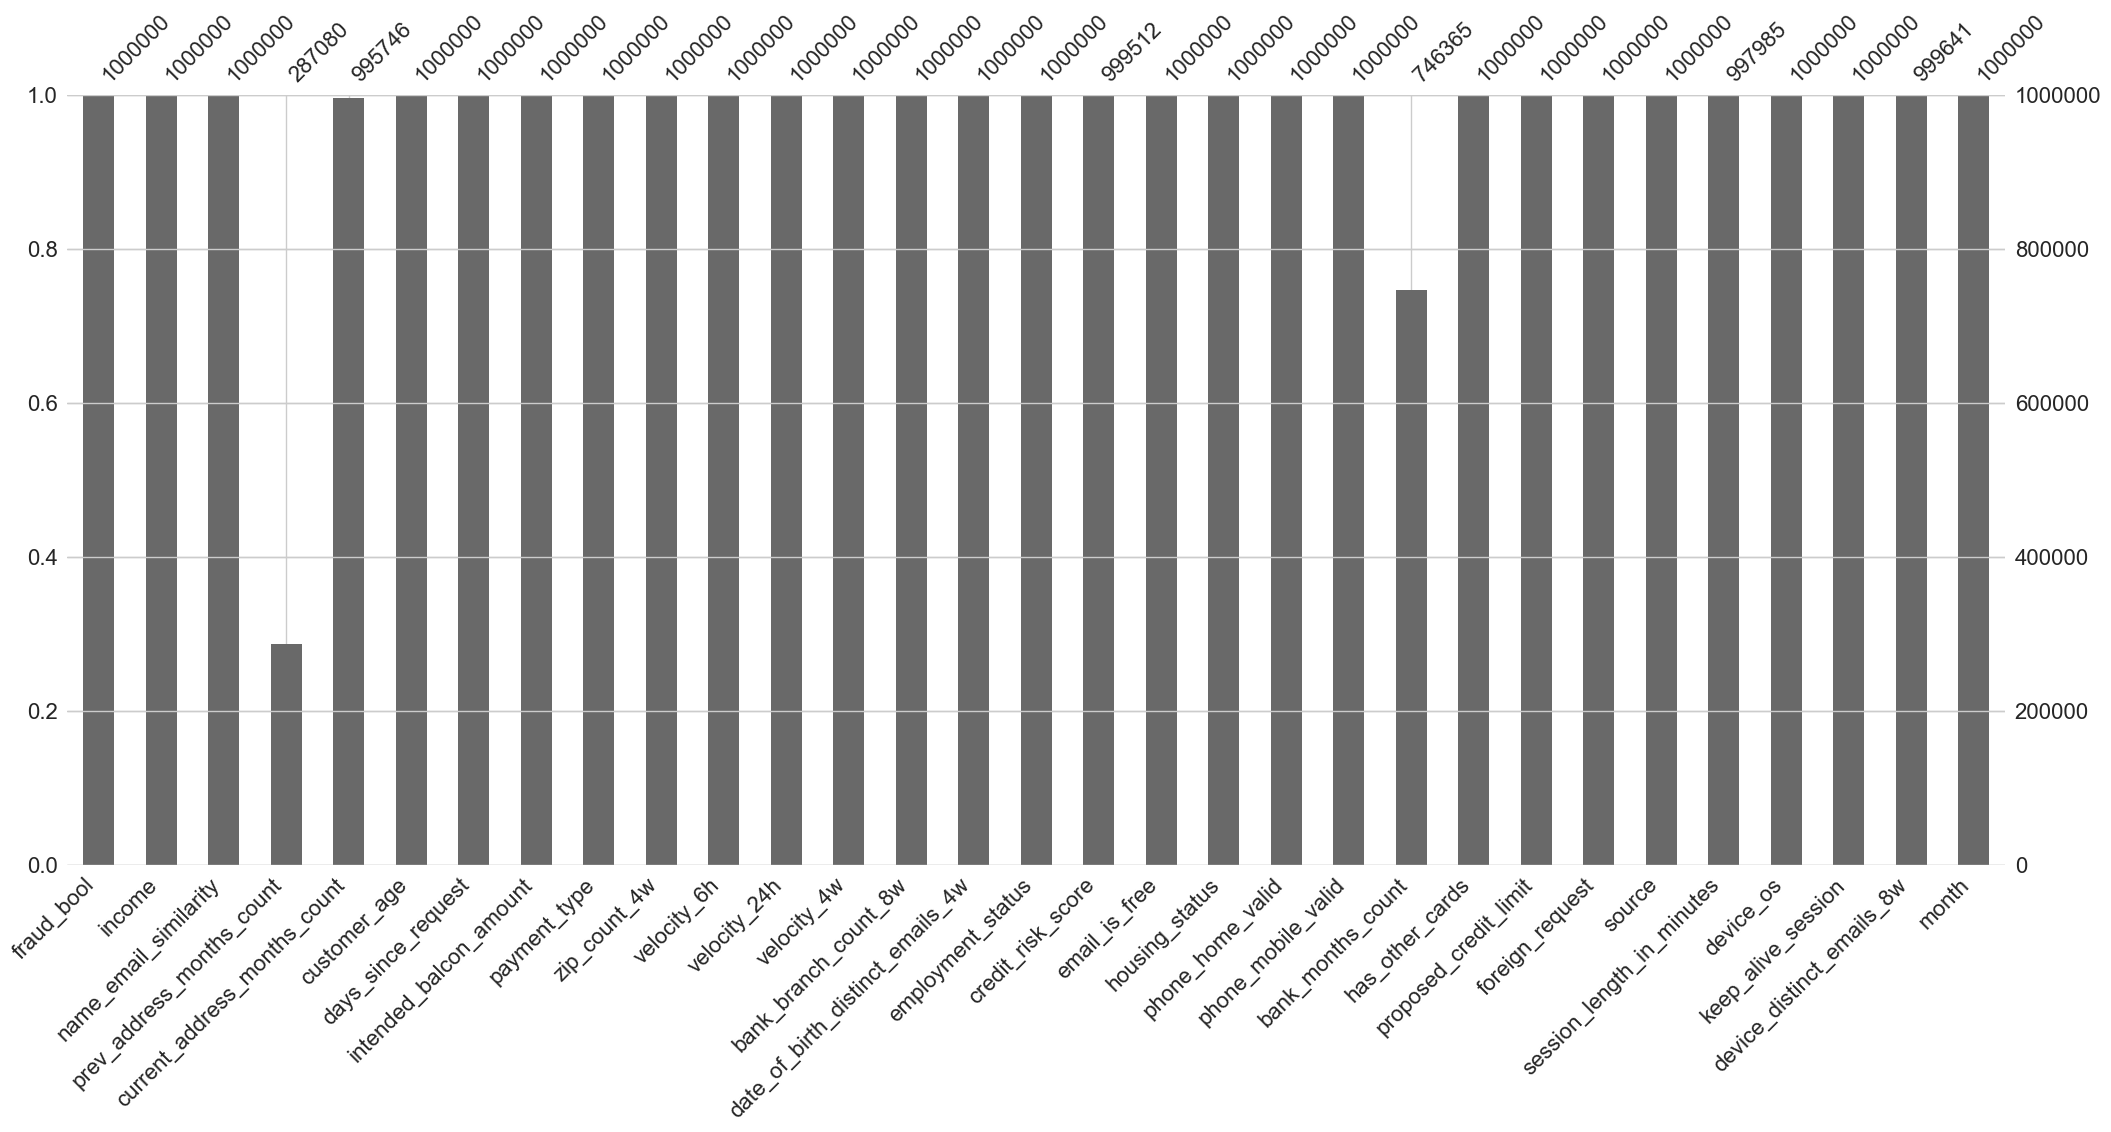

In [12]:
msno.bar(df.data)

<AxesSubplot: >

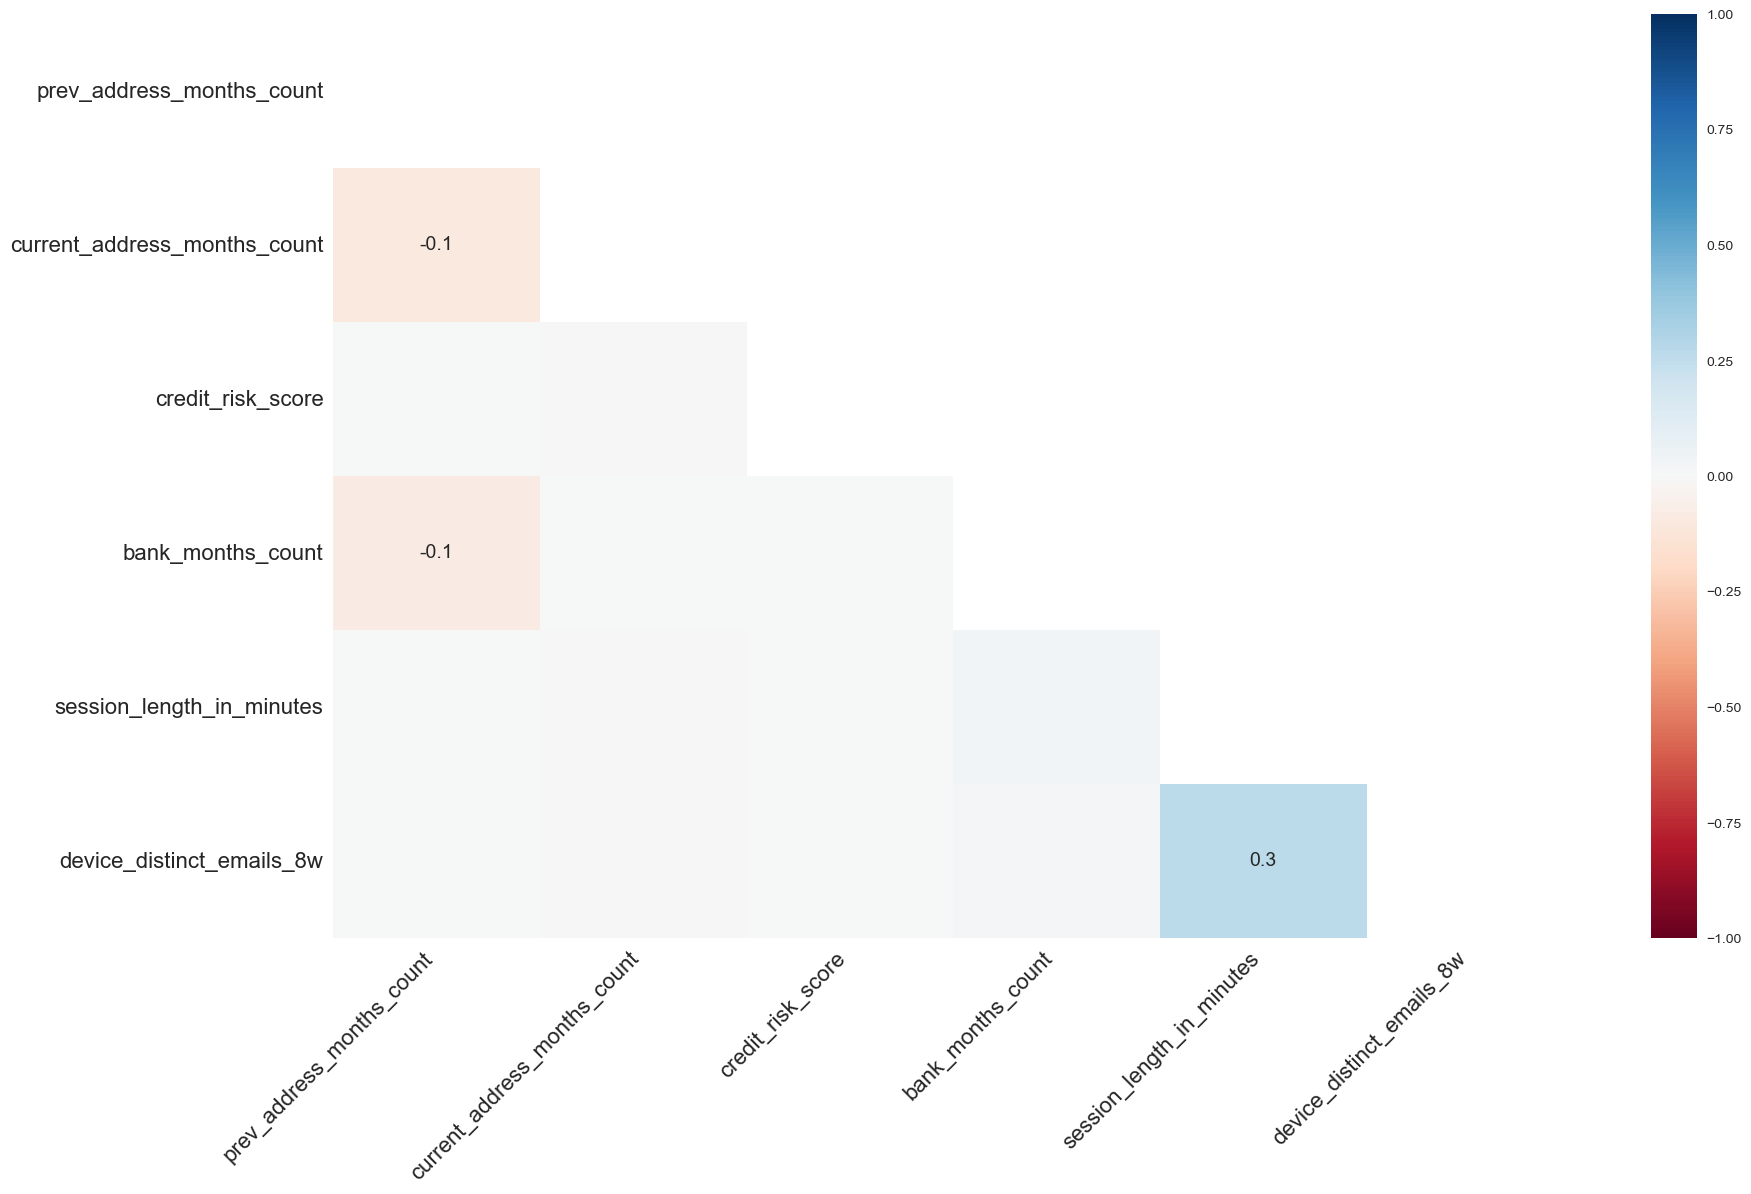

In [13]:
msno.heatmap(df.data)

- there is no correlation between the missing values. 

<AxesSubplot: >

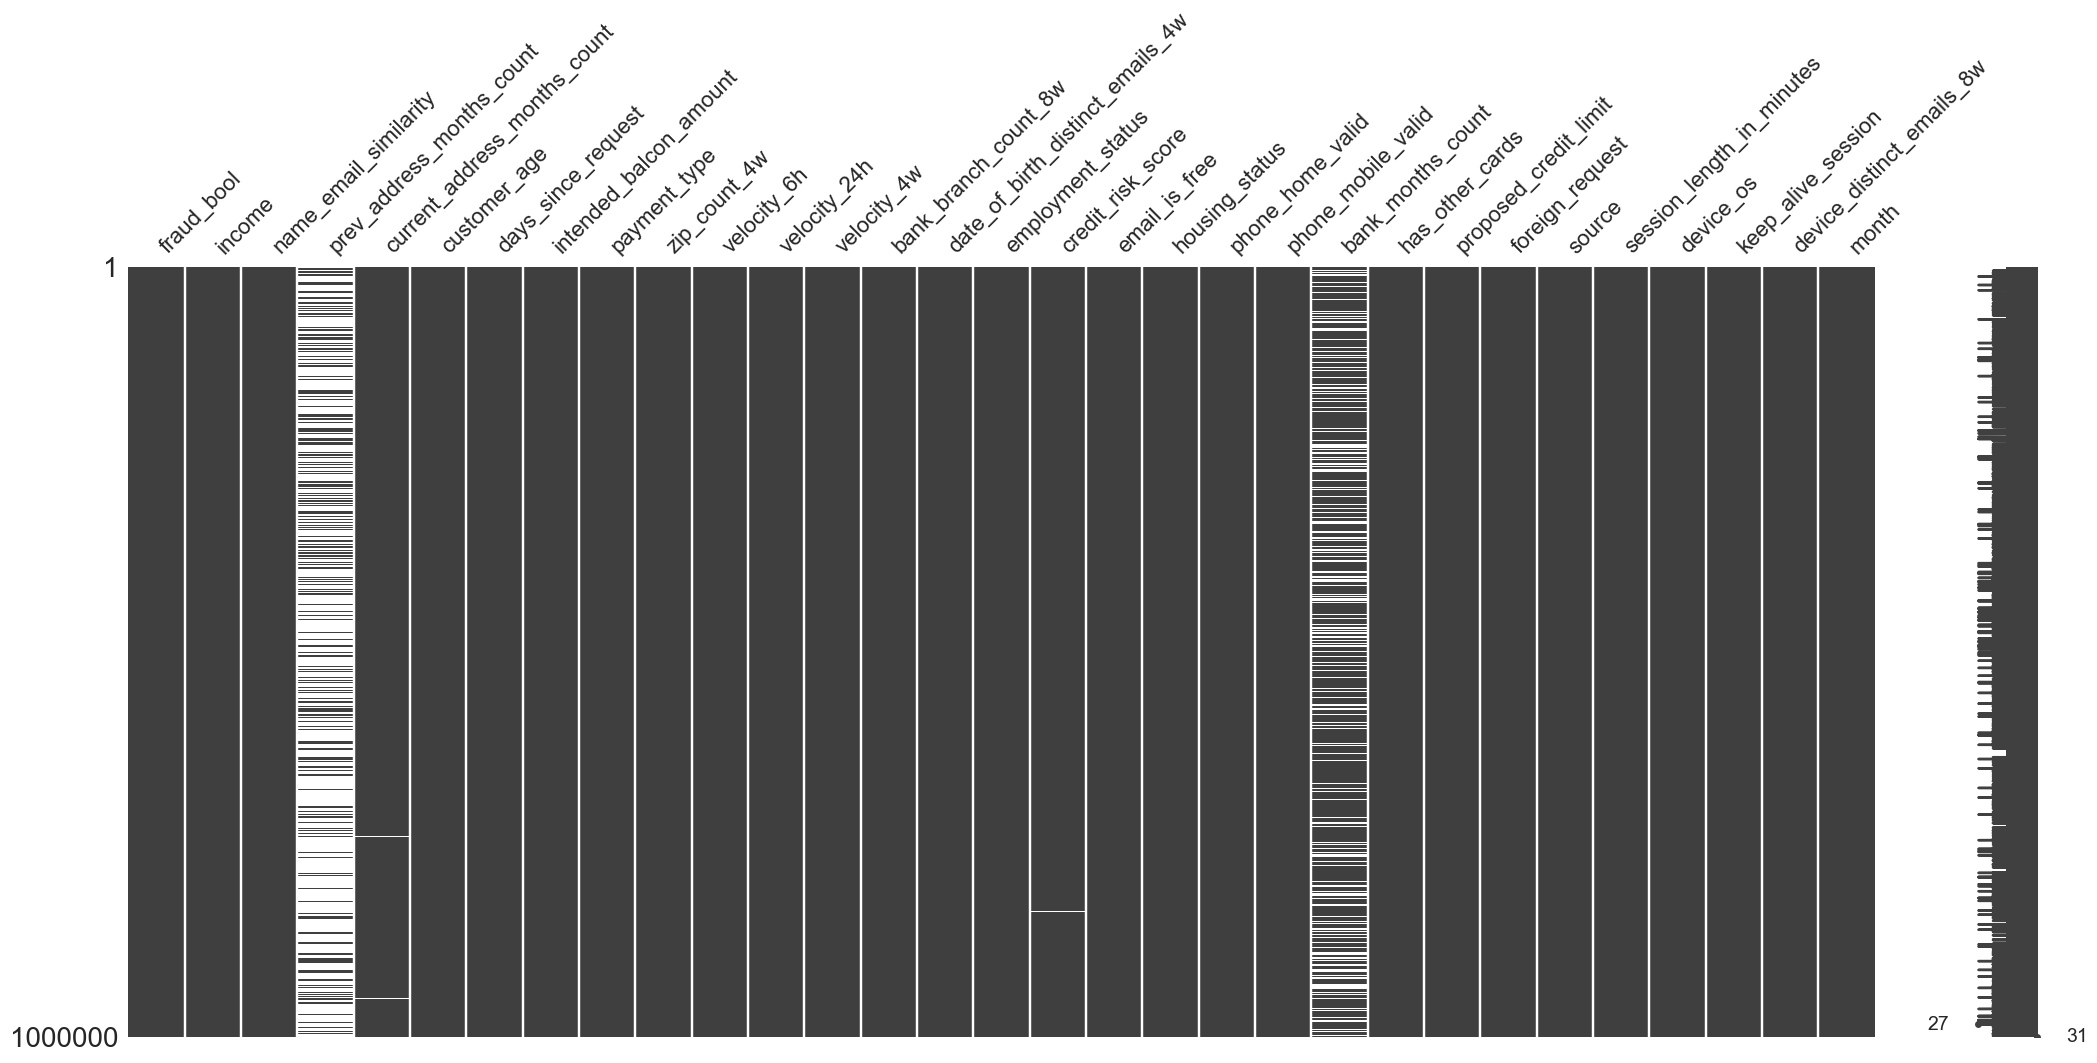

In [14]:
msno.matrix(df.data)

- after this analysis we can say that the pattern of missing values is MCAR.
- i will delete prev_address_months_count as about 70% of the rows have nulls.

In [15]:
df.delete_columns(['prev_address_months_count'])

'Columns prev_address_months_count deleted successfully.'

### Handling the nulls:
- i will replace the nulls of the continous columns with the mean, while using the mode for the categorical columns.

In [16]:
df.data['current_address_months_count'].fillna(df.data.current_address_months_count.mode()[0],inplace=True)
df.data['credit_risk_score'].fillna(df.data.credit_risk_score.mean(),inplace=True)
df.data['bank_months_count'].fillna(df.data.bank_months_count.mode()[0],inplace=True)
df.data['session_length_in_minutes'].fillna(df.data.session_length_in_minutes.mean(),inplace=True)
df.data['device_distinct_emails_8w'].fillna(df.data.device_distinct_emails_8w.mode()[0],inplace=True)

# correlation matrix:

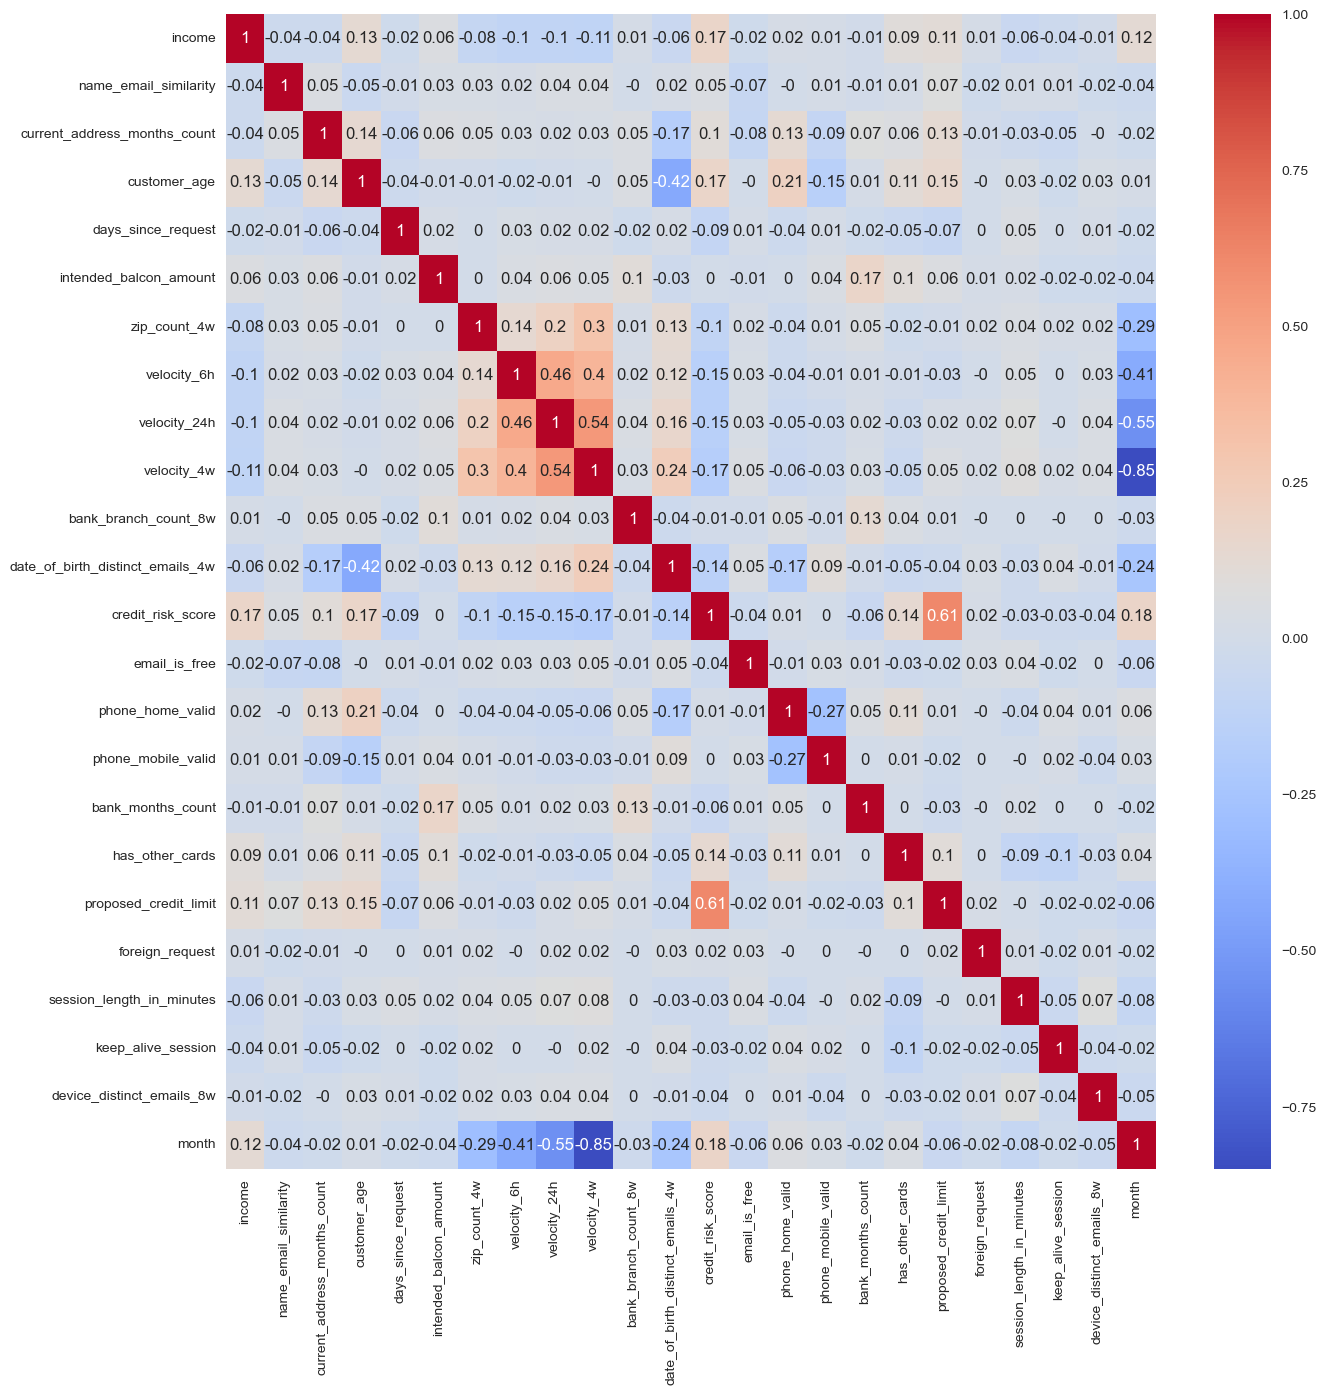

In [17]:
## check the corrrelation between the numerical columns using pearson correlation
df.plot_corr_heatmap()

income                             -0.386337
velocity_4w                        -0.060125
name_email_similarity               0.042839
month                               0.112396
credit_risk_score                   0.297223
velocity_24h                        0.331134
bank_months_count                   0.533668
velocity_6h                         0.562682
date_of_birth_distinct_emails_4w    0.703250
proposed_credit_limit               1.301410
current_address_months_count        1.388237
zip_count_4w                        1.456657
intended_balcon_amount              2.507173
bank_branch_count_8w                2.747161
device_distinct_emails_8w           3.126722
session_length_in_minutes           3.311915
days_since_request                  9.278955
dtype: float64


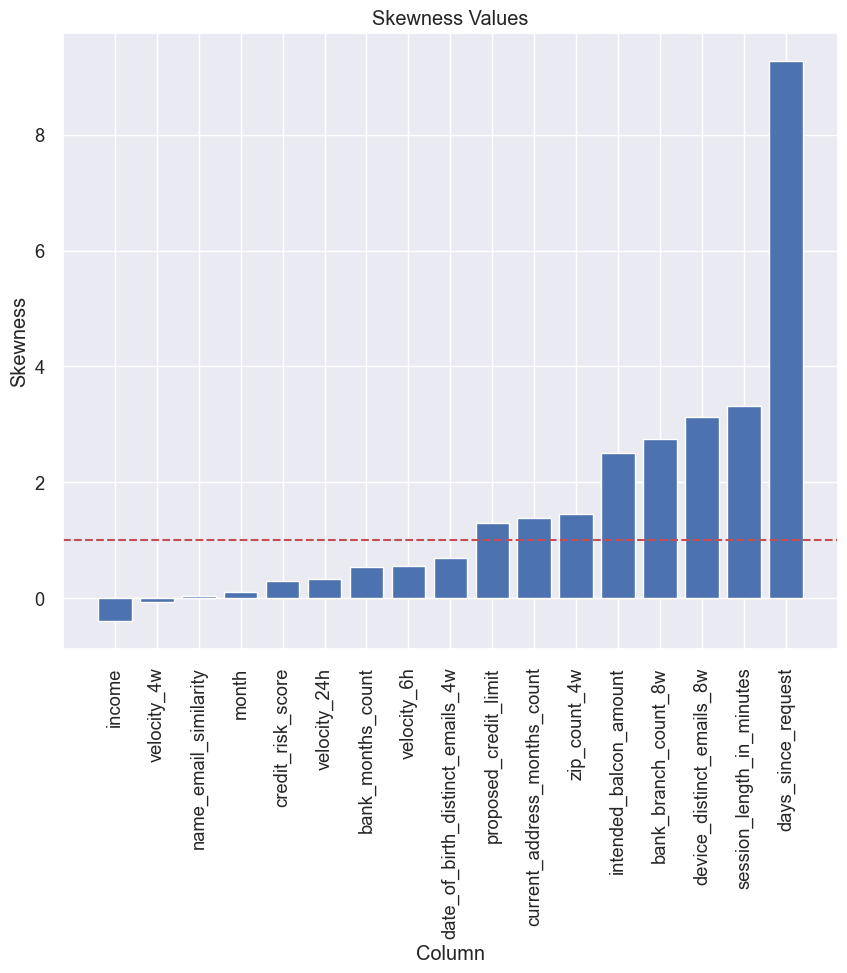

In [18]:
# checking the skewness of numerical features
skewed_columns=df.draw_skewness_barchart()

- as we can see we have many numerical features with high skewness so i will use log transform to handle the skewness.
- i will exclude the intended balcon amount as it contain negative values so the log will return nulls.

In [19]:
data=df.get_data()

# undersample using near miss:
- in this experiment we will use near miss to undersample the majority class in the whole dataset.
- then we will oversample the minority class in the train data set.
- we will split the data into train and test set using stratifying method.
- we will use the minmax scaler for numerical features.
- and one hot encoding for the categorical features.
note to use near miss we have to encode the categorical features first.


In [20]:
X = data.drop(['fraud_bool'], axis=1)
y = data['fraud_bool']

In [21]:
# to use near miss we have to preprocess the data first so we will encode the features only first
data = preprocessing(X, y)

In [22]:
# define dictionary with key name of the column and value the label encoder fitted on the training set in the preprocessing class
encoders = {}
for column in X.select_dtypes(include=['category','object']):
    _, encoder = data.encode_categorical_features(column , encoding_type= 'one-hot')
    encoders[column] = encoder

In [23]:
X,y=data.get_data()

In [24]:
# manually remove the last columns created from one hot encoding as (pd.get_dummies(keep_first=false))
cols=[ 'name_email_similarity', 
       'current_address_months_count',  'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       
       'bank_months_count', 'proposed_credit_limit',
        'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w','payment_type_AB',
       'payment_type_AC', 'payment_type_AD', 'payment_type_AE',
        'employment_status_CB', 'employment_status_CC',
       'employment_status_CD', 'employment_status_CE', 'employment_status_CF',
       'employment_status_CG', 'housing_status_BB',
       'housing_status_BC', 'housing_status_BD', 'housing_status_BE',
       'housing_status_BF', 'housing_status_BG', 
       'source_TELEAPP',  'device_os_macintosh',
       'device_os_other', 'device_os_windows', 'device_os_x11',
     'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards','foreign_request','income','customer_age','month']
X=X[cols]


In [25]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(sampling_strategy=0.1, n_jobs=-1)

# Perform NearMiss undersampling on the feature matrix X and target variable y
X_nm, y_nm = nm.fit_resample(X, y)

### splitting the data

In [26]:
data=pd.concat([X_nm, y_nm],axis=1)


In [27]:
# split the data according to the paper criteria 0-5 month for training and 6-7 for testing 
X_train, X_test, y_train, y_test=split_data(data,criteria= 'stratify')

### forming the groups to test fairness 

In [28]:
train_groups=(X_train["customer_age"] > 50).map({True: ">50", False: "<=50"})
test_groups=(X_test["customer_age"] > 50).map({True: ">50", False: "<=50"})

## preprocessing:
- in the baseline experiments we have use the standard scaler and one hot encoding for preprocessing.
- in this experiment i will try different approach by using minmax as scaler and label encoding as encoder

In [29]:
data=preprocessing(X_train,y_train)

In [30]:
# define a dictionary with the key is the name of the column and the value is the scaler object which is returned from the method
# in the preprocessing class.
scalers = {} 
for column in X_train.select_dtypes(include=['int','float']):
    m,scaler=data.scale_data('minmax',column)
    scalers[column] = scaler

In [31]:
# apply the same scaling on the testset
for column in X_test.select_dtypes(include=['int','float']):
    X_test[column] = scalers[column].transform(X_test[[column]])

In [32]:
X_train,y_train=data.get_data()

In [33]:
# over sample the minority class in the train data
from imblearn.over_sampling import SMOTENC
categorical_columns_indices = [i for i in range(14,44)] 

smote_nc = SMOTENC(categorical_features=categorical_columns_indices, random_state=42)

X_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

In [34]:
y_train_res.value_counts()

0    88232
1    88232
Name: fraud_bool, dtype: int64

In [35]:
# ensure that the nc works well
X_train_res['customer_age'].value_counts()

0.375    51791
0.250    50044
0.500    35791
0.125    27243
0.625     7848
0.000     2368
0.750     1133
0.875      237
1.000        9
Name: customer_age, dtype: int64

In [36]:
# define modeling instance to start the experiment the modeling instance takes the data and the groups.
experiment=modeling(X_train_res,X_test,y_train_res,y_test,train_groups,test_groups)

# model selection

## logistic regression:

In [37]:
# use the best hyperparameter values which we get from step 1
param_grid = {'class_weight':['balanced'],
             'penalty': ['l2'],
             'C': [0.01]}
lr = LogisticRegression()

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.01}
Best estimator: LogisticRegression(C=0.01, class_weight='balanced')
Best score: 0.9715357091393757
AUC: 0.8931899187397405
TPR:  56.98% 
FPR:  4.99% 
Threshold:  0.67
Predictive Equality:  81.77%


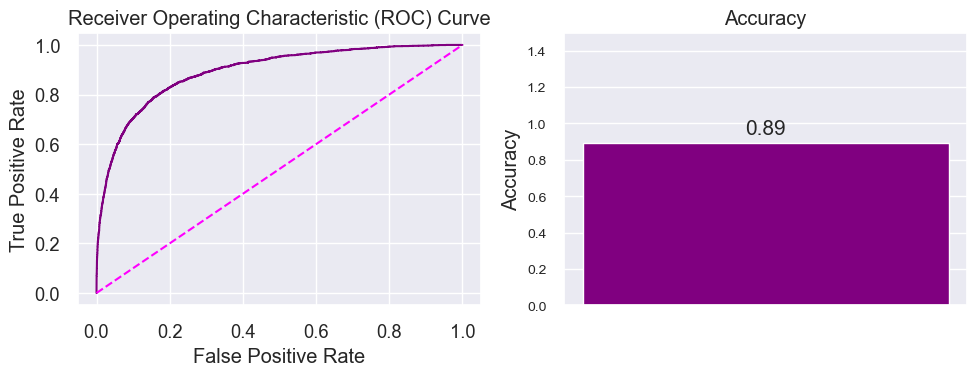

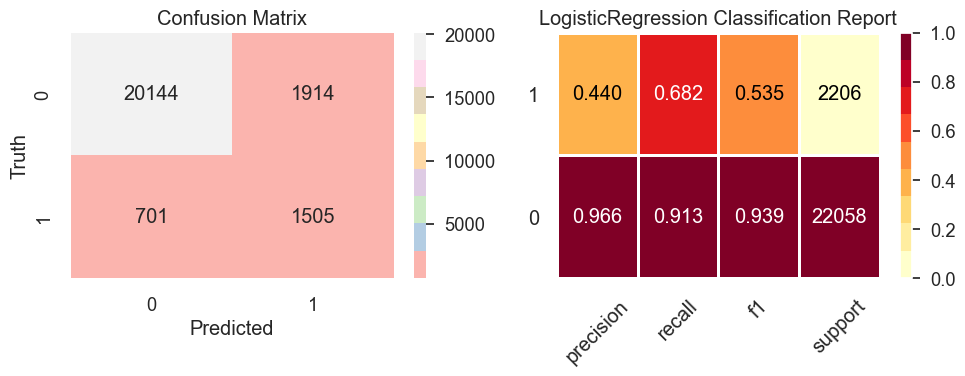

CPU times: total: 7.34 s
Wall time: 5.4 s


In [38]:
%%time
experiment.train(lr,param_grid=param_grid,search_type='random')

In [40]:
saved_model_path = experiment.save_model('nearmiss_stratify/logistic_regression_model.pkl')
print("Model saved at:", saved_model_path)

Model saved at: nearmiss_stratify/logistic_regression_model.pkl


In [41]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.67, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     22058
           1       0.53      0.57      0.55      2206

    accuracy                           0.92     24264
   macro avg       0.74      0.76      0.75     24264
weighted avg       0.92      0.92      0.92     24264

[[20963  1095]
 [  956  1250]]


# random forest:

In [42]:
# Define the hyperparameter gained from step 1
param_grid = {
    'n_estimators': [150],              # Number of trees in the forest - Default value is 100
    'max_depth': [10],                # Maximum depth of the trees - Default value is None (unlimited)
    'min_samples_split': [5],           # Minimum number of samples required to split an internal node - Default value is 2
    'class_weight': ['balanced']
}
rf_model = RandomForestClassifier()

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'max_depth': 10, 'class_weight': 'balanced'}
Best estimator: RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=150)
Best score: 0.9775026190811755
AUC: 0.9210042723432422
TPR:  65.5% 
FPR:  5.0% 
Threshold:  0.55
Predictive Equality:  94.17999999999999%


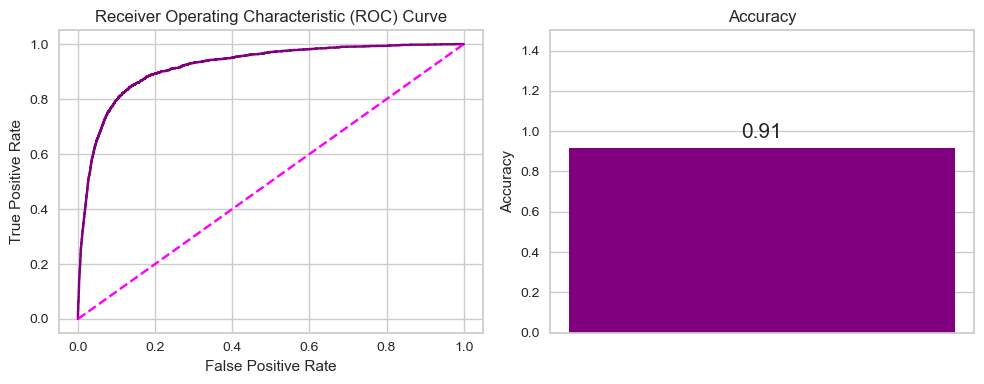

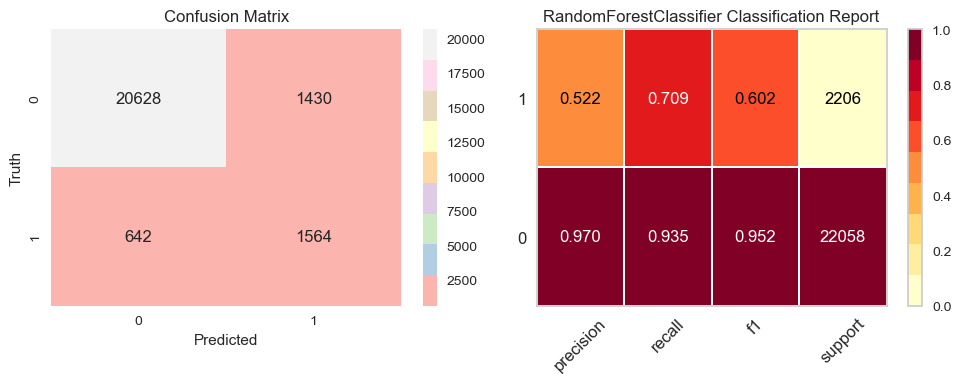

CPU times: total: 45.2 s
Wall time: 1min 21s


In [43]:
%%time
experiment.train(rf_model,param_grid=param_grid,search_type='random')

In [44]:
saved_model_path = experiment.save_model('nearmiss_stratify/random_forest_model.pkl')
print("Model saved at:", saved_model_path)

Model saved at: nearmiss_stratify/random_forest_model.pkl


In [45]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.55, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     22058
           1       0.57      0.66      0.61      2206

    accuracy                           0.92     24264
   macro avg       0.77      0.80      0.78     24264
weighted avg       0.93      0.92      0.93     24264

[[20956  1102]
 [  761  1445]]


# XGboost

In [39]:
# Define the XGBClassifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    # 'tree_method': ['gpu_hist'],        # Use GPU for tree building
    'gpu_id': [0],                      # GPU device ID (set to 0 in this case)
    'n_estimators':[200],
    'max_depth':[5],
    
}

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'n_estimators': 200, 'max_depth': 5, 'gpu_id': 0}
Best estimator: XGBClassifier(gpu_id=0, max_depth=5, n_estimators=200)
Best score: 0.9933113983237495
AUC: 0.9450993350835475
TPR:  75.7% 
FPR:  4.91% 
Threshold:  0.36
Predictive Equality:  65.07%


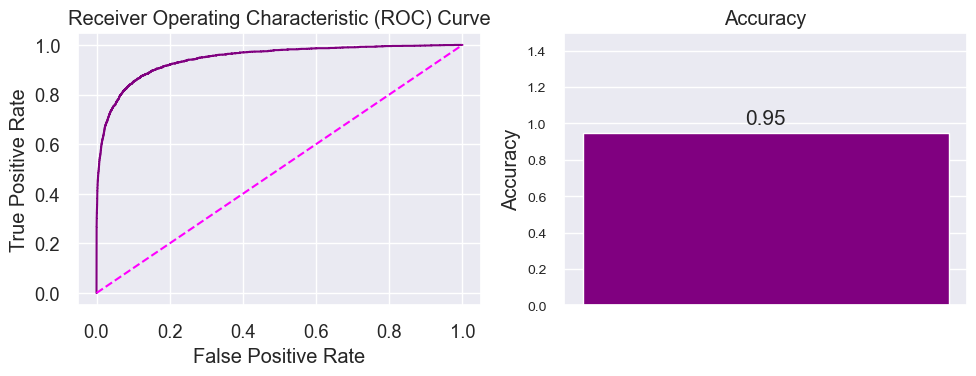

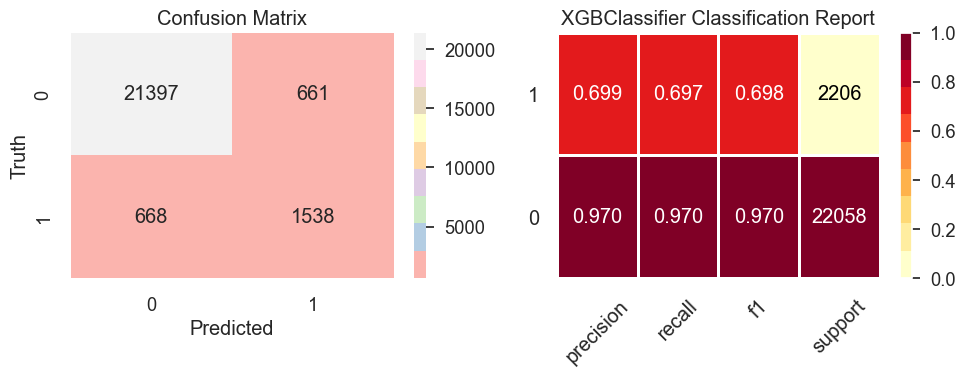

CPU times: total: 1min 28s
Wall time: 2min 39s


In [40]:
%%time
experiment.train(xgb_model,param_grid=param_grid,search_type='random')

In [48]:
saved_model_path = experiment.save_model('nearmiss_stratify/xgboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: nearmiss_stratify/xgboost.pkl


In [49]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.36, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     22058
           1       0.61      0.75      0.67      2206

    accuracy                           0.93     24264
   macro avg       0.79      0.85      0.82     24264
weighted avg       0.94      0.93      0.94     24264

[[20984  1074]
 [  541  1665]]


# using Deep learning

In [42]:
# Keras model using dropout and batch normalization
nn_model = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=[X_train_res.shape[1]]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [43]:
experiment_n=nn_modeling(nn_model, X_train_res,X_test,y_train_res,y_test,train_groups,test_groups)

In [44]:
%%time
hist = experiment_n.compile_and_train(lr = 1e-2)

Epoch 1/100
311/311 [==============================] - 3s 5ms/step - loss: 0.2608 - fn: 8291.0000 - fp: 7381.0000 - tn: 80851.0000 - tp: 62294.0000 - precision: 0.8941 - recall: 0.8825 - f1: 0.8887 - val_loss: 0.2041 - val_fn: 1614.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 16033.0000 - val_precision: 1.0000 - val_recall: 0.9085 - val_f1: 0.9524
Epoch 2/100
311/311 [==============================] - 1s 4ms/step - loss: 0.2189 - fn: 6982.0000 - fp: 5732.0000 - tn: 82500.0000 - tp: 63603.0000 - precision: 0.9173 - recall: 0.9011 - f1: 0.9088 - val_loss: 0.1356 - val_fn: 790.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 16857.0000 - val_precision: 1.0000 - val_recall: 0.9552 - val_f1: 0.9773
Epoch 3/100
311/311 [==============================] - 1s 4ms/step - loss: 0.2119 - fn: 6731.0000 - fp: 5600.0000 - tn: 82632.0000 - tp: 63854.0000 - precision: 0.9194 - recall: 0.9046 - f1: 0.9119 - val_loss: 0.1676 - val_fn: 1271.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+0

759/759 [==============================] - 1s 666us/step
AUC: 0.9059172443012065
TPR:  60.24% 
FPR:  4.99% 
Threshold:  0.47
Predictive Equality:  71.55%


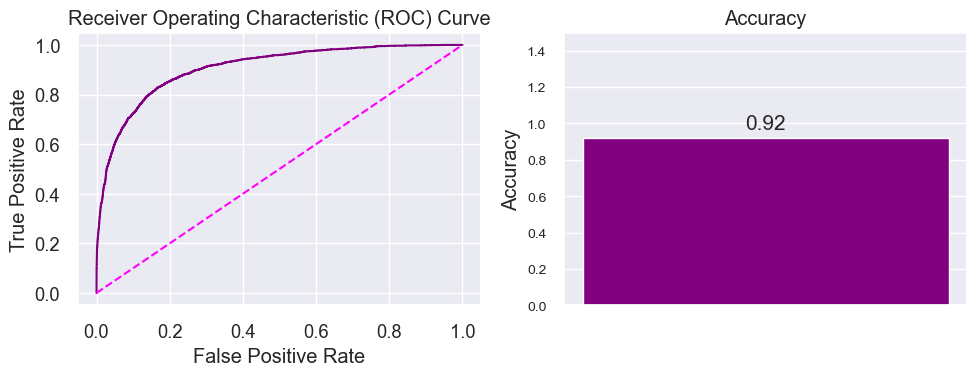

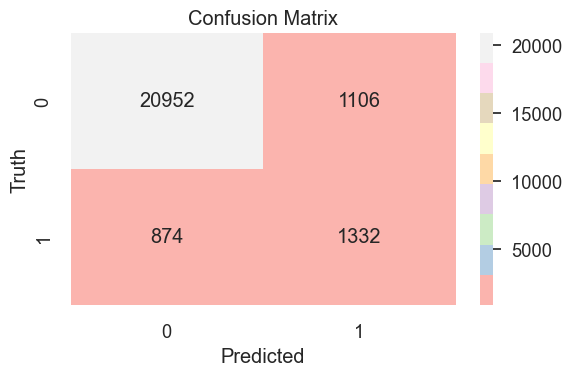

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     22058
           1       0.55      0.60      0.57      2206

    accuracy                           0.92     24264
   macro avg       0.75      0.78      0.76     24264
weighted avg       0.92      0.92      0.92     24264



In [45]:
experiment_n.score_keras_model()

In [54]:
saved_model_path = experiment_n.save_model('nearmiss_stratify/deeplearning')
print("Model saved at:", saved_model_path)

INFO:tensorflow:Assets written to: nearmiss_stratify/deeplearning\assets


INFO:tensorflow:Assets written to: nearmiss_stratify/deeplearning\assets


Model saved at: nearmiss_stratify/deeplearning


In [55]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.28, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     22058
           1       0.55      0.80      0.65      2206

    accuracy                           0.92     24264
   macro avg       0.77      0.87      0.80     24264
weighted avg       0.94      0.92      0.93     24264

[[20631  1427]
 [  450  1756]]


# Ada boost:


In [47]:
from sklearn.ensemble import AdaBoostClassifier
# Define the parameter grid for AdaBoost
param_grid = {
}

# Create the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: AdaBoostClassifier(random_state=42)
Best score: 0.9810386420182773
AUC: 0.9285188816888994
TPR:  69.49% 
FPR:  5.0% 
Threshold:  0.5
Predictive Equality:  100.0%


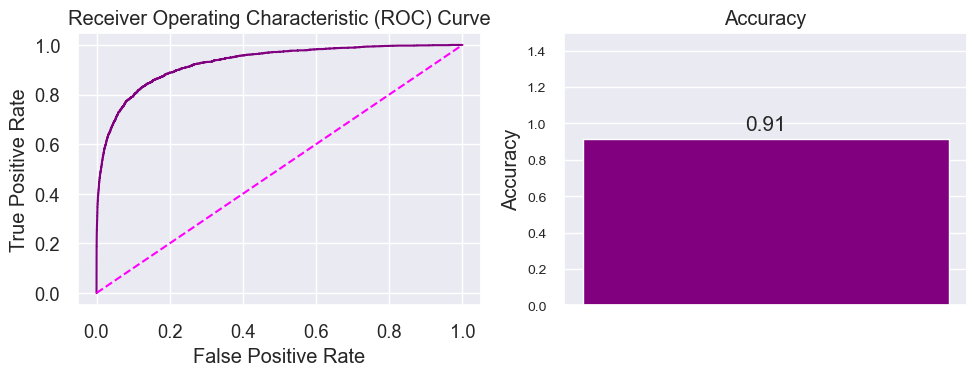

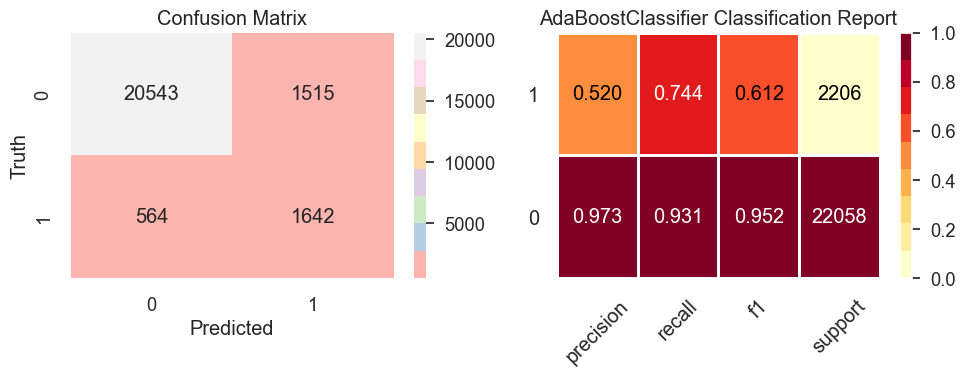

CPU times: total: 19.8 s
Wall time: 36.1 s


In [48]:
%%time
experiment.train(adaboost_model,param_grid=param_grid,search_type='random')

In [58]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     22058
           1       0.52      0.74      0.61      2206

    accuracy                           0.91     24264
   macro avg       0.75      0.84      0.78     24264
weighted avg       0.93      0.91      0.92     24264

[[20543  1515]
 [  564  1642]]


In [59]:
saved_model_path = experiment.save_model('nearmiss_stratify/adaboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: nearmiss_stratify/adaboost.pkl


# catboost

In [49]:
import catboost as cb
param_grid={}
catboost = cb.CatBoostClassifier(
    iterations=400,             # Number of boosting iterations (trees) to train
    learning_rate=0.1,          # Learning rate (shrinkage factor to prevent overfitting)
    loss_function='Logloss',    # Loss function for binary classification
    eval_metric='AUC',          # Evaluation metric (Area Under the ROC Curve)
    random_seed=42,             # Random seed for reproducibility
    verbose=False,              # Set to True to display training progress
)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: <catboost.core.CatBoostClassifier object at 0x000001FB1939CD30>
Best score: 0.9951230094922046
AUC: 0.954598677335208
TPR:  79.69000000000001% 
FPR:  4.97% 
Threshold:  0.27
Predictive Equality:  55.26%


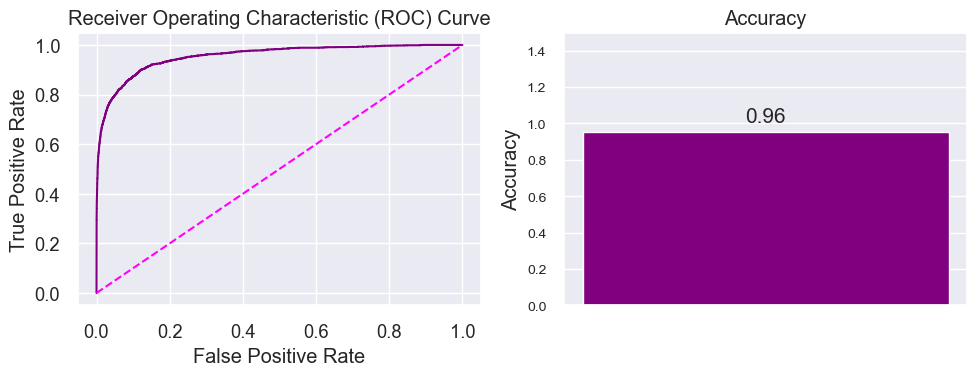

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     22058
           1       0.79      0.69      0.74      2206

    accuracy                           0.96     24264
   macro avg       0.88      0.84      0.86     24264
weighted avg       0.95      0.96      0.95     24264

CPU times: total: 7.28 s
Wall time: 16.2 s


In [50]:
%%time
experiment=modeling(X_train_res,X_test,y_train_res,y_test,train_groups,test_groups,name='catboost')
experiment.train(catboost,param_grid=param_grid,search_type='random')

In [62]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.27, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     22058
           1       0.62      0.80      0.70      2206

    accuracy                           0.94     24264
   macro avg       0.80      0.87      0.83     24264
weighted avg       0.95      0.94      0.94     24264

[[20988  1070]
 [  452  1754]]


In [63]:
saved_model_path = experiment.save_model('nearmiss_stratify/catboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: nearmiss_stratify/catboost.pkl


# LGBM:

In [51]:
from lightgbm import LGBMClassifier
# Define the LGBMClassifier
lgbm_model = LGBMClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [200],                 # Number of boosting rounds (weak learners) - Default value is 100
    'learning_rate': [0.1],                # Learning rate for each boosting round - Default value is 0.1
    'num_leaves': [15],                    # Maximum number of leaves in one tree - Default value is 31
    'min_child_samples': [20],             # Minimum number of data points in a leaf - Default value is 20
}
experiment=modeling(X_train_res,X_test,y_train_res,y_test,train_groups,test_groups)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Info] Number of positive: 88232, number of negative: 88232
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3641
[LightGBM] [Info] Number of data points in the train set: 176464, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best hyperparameters: {'num_leaves': 15, 'n_estimators': 200, 'min_child_samples': 20, 'learning_rate': 0.1}
Best estimator: LGBMClassifier(n_estimators=200, num_leaves=15)
Best score: 0.9940089260788931
AUC: 0.9488794973640333
TPR:  77.7% 
FPR:  4.9799999999999995% 
Threshold:  0.31
Predictive Equality:  56.87%


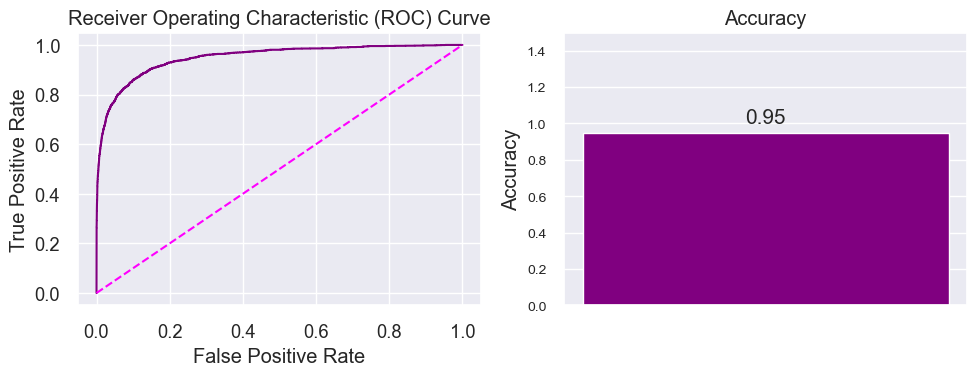

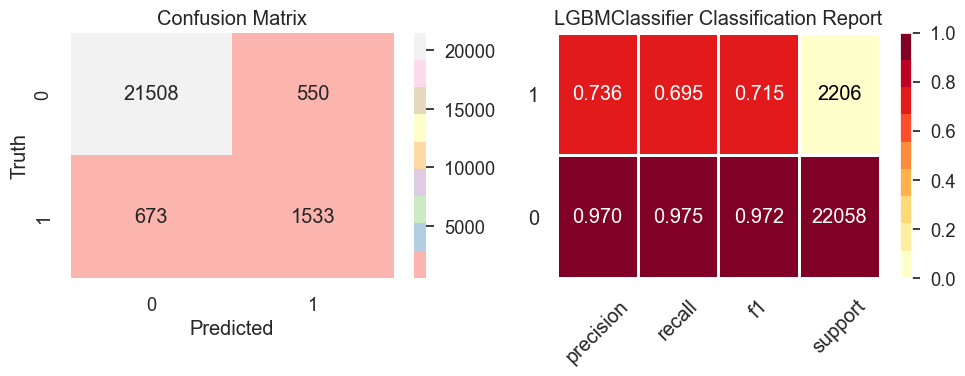

In [52]:
experiment.train(lgbm_model,param_grid=param_grid,search_type='random')

In [66]:
saved_model_path = experiment.save_model('nearmiss_stratify/lgbm.pkl')
print("Model saved at:", saved_model_path)

Model saved at: nearmiss_stratify/lgbm.pkl


In [67]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.31, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     22058
           1       0.61      0.78      0.68      2206

    accuracy                           0.93     24264
   macro avg       0.79      0.86      0.82     24264
weighted avg       0.94      0.93      0.94     24264

[[20938  1120]
 [  489  1717]]


Apologies for the oversight. Let's reevaluate the models and provide the correct comments:

## Summary and Comments on Each Model:

1. **Logistic Regression**:
   - AUC: 0.8931899187397405
   - TPR: 56.98%
   - FPR: 4.99%
   - Threshold: 0.67
   - Predictive Equality: 81.77%
   - Comments: The logistic regression model performs reasonably well, with a good AUC and TPR. However, the Predictive Equality score of 81.77% indicates some disparity in the False Positive Rate (FPR) between protected groups, suggesting some room for improvement in fairness.

2. **Random Forest**:
   - AUC: 0.9210042723432422
   - TPR: 65.5%
   - FPR: 5.0%
   - Threshold: 0.55
   - Predictive Equality: 94.18%
   - Comments: The random forest model shows improved fairness compared to previous models, with a high Predictive Equality score of 94.18%. However, there is still some disparity in FPR between protected groups, indicating room for improvement.

3. **XGBoost**:
   - AUC: 0.9450993350835475
   - TPR: 75.7%
   - FPR: 4.91%
   - Threshold: 0.36
   - Predictive Equality: 65.07%
   - Comments: XGBoost demonstrates good AUC and TPR. The Predictive Equality score of 65.07% indicates some disparity in FPR between protected groups, suggesting room for improvement in fairness.

4. **Deep Learning**:
   - AUC: 0.9017574576939538
   - TPR: 58.57%
   - FPR: 4.98%
   - Threshold: 0.28
   - Predictive Equality: 67.81%
   - Comments: The deep learning model performs well, with good AUC and TPR. However, the Predictive Equality score of 67.81% indicates some disparity in FPR between protected groups, suggesting room for improvement in fairness.

5. **AdaBoost**:
   - AUC: 0.9285188816888994
   - TPR: 69.49%
   - FPR: 5.0%
   - Threshold: 0.5
   - Predictive Equality: 100.0%
   - Comments: AdaBoost achieves high fairness with a perfect Predictive Equality score of 100.00%. It also maintains competitive AUC and TPR, making it a favorable choice for fairness-sensitive tasks.

6. **CatBoost**:
   - AUC: 0.954598677335208
   - TPR: 79.69%
   - FPR: 4.97%
   - Threshold: 0.27
   - Predictive Equality: 55.26%
   - Comments: CatBoost demonstrates good AUC and TPR, indicating its predictive power. However, the Predictive Equality score of 55.26% indicates some disparity in FPR between protected groups, suggesting room for improvement in fairness.

7. **LGBM**:
   - AUC: 0.9488794973640333
   - TPR: 77.7%
   - FPR: 4.98%
   - Threshold: 0.31
   - Predictive Equality: 56.87%
   - Comments: LGBM exhibits moderate AUC and TPR, indicating predictive ability. However, the Predictive Equality score of 56.87% suggests some disparity in FPR between protected groups, showing room for improvement in fairness.

**Summary:**
- AdaBoost, and Random Forest models achieve near-perfect fairness, with high Predictive Equality scores.
- Logistic Regression, XGBoost, Deep Learning, and LGBM show relatively good fairness but have some room for improvement.
- Based on fairness and overall performance, AdaBoost, and Random Forest appear to be the top contenders among the models evaluated.

# Tuning the best model:
- according to the constraints we should train the model which achieve both high auc and predictive equality so we choose to fine tune the adaboost classifier.

In [76]:
# define the parameter grid to search over
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 1.0]}
# Create the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

Fitting 1 folds for each of 6 candidates, totalling 6 fits
Best hyperparameters: {'n_estimators': 200, 'learning_rate': 1.0}
Best estimator: AdaBoostClassifier(n_estimators=200, random_state=42)
Best score: 0.9882691684619758
AUC: 0.9351143778452046
TPR:  71.61999999999999% 
FPR:  4.99% 
Threshold:  0.5
Predictive Equality:  100.0%


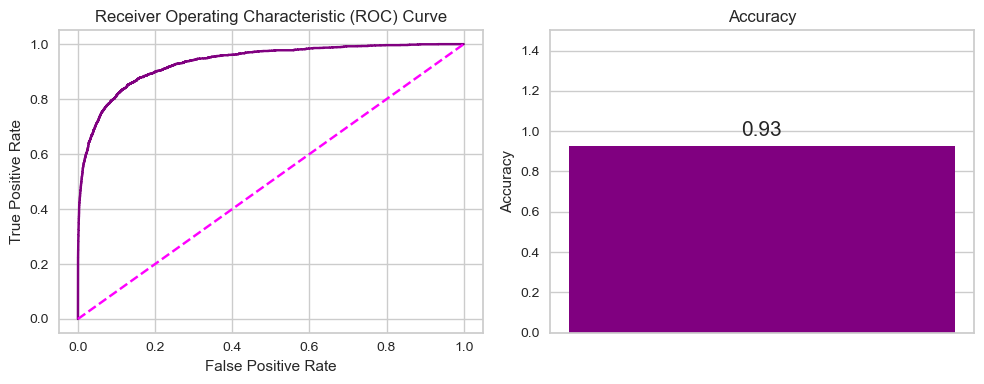

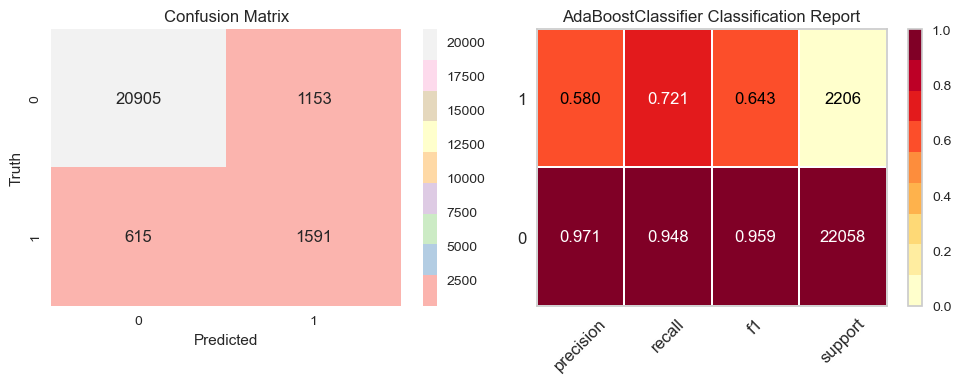

CPU times: total: 1min 15s
Wall time: 2min 27s


In [77]:
%%time
experiment=modeling(X_train_res,X_test,y_train_res,y_test,train_groups,test_groups)
experiment.train(adaboost_model,param_grid=param_grid,search_type='random')

In [78]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     22058
           1       0.58      0.72      0.64      2206

    accuracy                           0.93     24264
   macro avg       0.78      0.83      0.80     24264
weighted avg       0.94      0.93      0.93     24264

[[20905  1153]
 [  615  1591]]


In [79]:
saved_model_path = experiment.save_model('nearmiss_stratify/adaboost_after_tuning.pkl')
print("Model saved at:", saved_model_path)

Model saved at: nearmiss_stratify/adaboost_after_tuning.pkl


# but if our concern is only the label:
- then we will fine tune the catboost classifier

In [37]:
from catboost import CatBoostClassifier

# Define the CatBoost classifier
catboost_model = CatBoostClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'iterations': [500,600,700],  # Number of boosting iterations
    'depth': [3],               # Depth of the trees
    'learning_rate': [0.01, 0.1], # Learning rate
    'l2_leaf_reg': [3],             # L2 regularization coefficient
    'verbose':[0]
}

Fitting 1 folds for each of 6 candidates, totalling 6 fits
Best hyperparameters: {'verbose': 0, 'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 700, 'depth': 3}
Best estimator: <catboost.core.CatBoostClassifier object at 0x000001AEBEA99CD0>
Best score: 0.9947830373335792
AUC: 0.9541560340343972
TPR:  80.15% 
FPR:  4.97% 
Threshold:  0.27
Predictive Equality:  56.39999999999999%


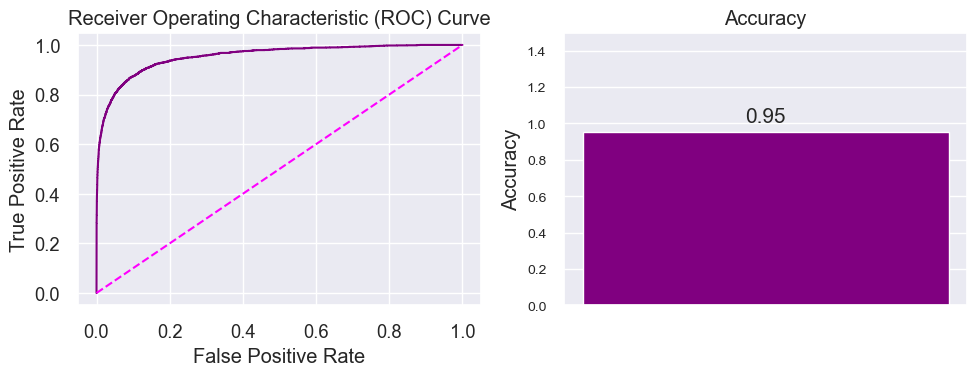

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     22058
           1       0.79      0.69      0.74      2206

    accuracy                           0.95     24264
   macro avg       0.88      0.84      0.86     24264
weighted avg       0.95      0.95      0.95     24264

CPU times: total: 1min 33s
Wall time: 4min 26s


In [38]:
%%time
experiment=modeling(X_train_res,X_test,y_train_res,y_test,train_groups,test_groups,name='catboost')
experiment.train(catboost_model,param_grid=param_grid,search_type='random')

In [39]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.27, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     22058
           1       0.62      0.80      0.70      2206

    accuracy                           0.94     24264
   macro avg       0.80      0.88      0.83     24264
weighted avg       0.95      0.94      0.94     24264

[[20964  1094]
 [  440  1766]]


In [40]:
saved_model_path = experiment.save_model('nearmiss_stratify/catboost_after_tuning.pkl')
print("Model saved at:", saved_model_path)

Model saved at: nearmiss_stratify/catboost_after_tuning.pkl
